In [188]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical

In [189]:
from keras.datasets import imdb 
top_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=top_words)

In [190]:
print(train_data,train_data.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

after converting text to integers,we have to convert from lists to tensors,because neural network cannot take integers as input. in the format of (sample,indices) and for this,first we have to make sure all the reviews are of the same lenght.

now we have to perform one hot encoding to convert integers to binary values

In [191]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [192]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print("x_train ", x_train.shape)
print("x_test ", x_test.shape)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

x_train  (25000, 10000)
x_test  (25000, 10000)
y_train  (25000,)
y_test  (25000,)


In [193]:
print(x_train)
print(train_labels)
print(train_labels.shape)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[1 0 0 ... 0 1 0]
(25000,)


In [194]:
# Set a VALIDATION set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [195]:
# Use of DROPOUT
#model = models.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001),activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(1, activation='sigmoid'))
# Use of REGULARIZATION
#model = models.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))
#model = models.Sequential()
#model.add(layers.Dense(60, activation='relu', input_shape=(10000,)))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(30, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(15, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(1, activation='sigmoid'))
model = models.Sequential()
model.add(layers.Dense(60, activation='tanh', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
#model.add(layers.Dense(60, activation='tanh'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Regularization technique is dropout because a fully connected layer takes up the majority of the parameters, co-dependency between neurons during training reduces each neuron's own power and causes the training data to be overfit. To prevent this, we employ DROPOUT.
Sigmoid activation function is used in the last layer because it is a binary classification problem.

In [196]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 60)                600060    
                                                                 
 dropout_22 (Dropout)        (None, 60)                0         
                                                                 
 dense_44 (Dense)            (None, 1)                 61        
                                                                 
Total params: 600,121
Trainable params: 600,121
Non-trainable params: 0
_________________________________________________________________


In [197]:
# FIT / TRAIN model

NumEpochs = 3
BatchSize = 512

model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/3
30/30 [==============================] - 3s 93ms/step - loss: 0.1660 - acc: 0.7687 - val_loss: 0.1159 - val_acc: 0.8639
Epoch 2/3
30/30 [==============================] - 2s 67ms/step - loss: 0.0986 - acc: 0.8825 - val_loss: 0.0955 - val_acc: 0.8799
Epoch 3/3
782/782 [==============================] - 3s 4ms/step - loss: 0.0898 - acc: 0.8837
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.08978979289531708, 0.883679986000061]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [198]:
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
train_acc = history.history['acc']

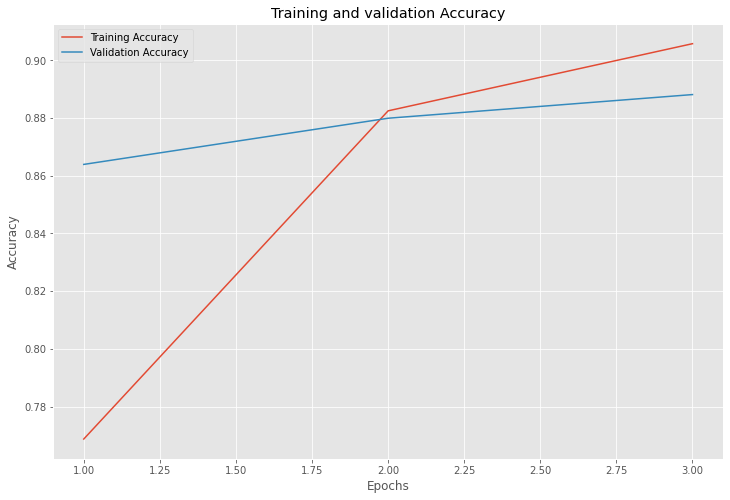

In [199]:
plt.figure(figsize=(12,8))
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

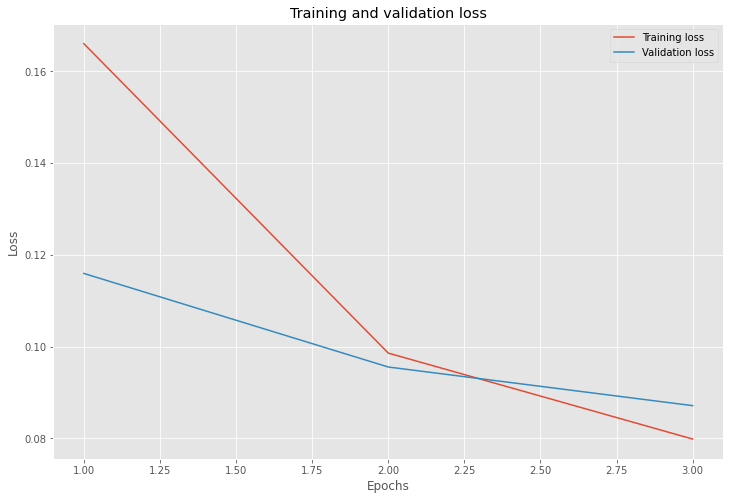

In [200]:
plt.figure(figsize=(12,8))
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

When validation 
results start to deteriorate, we call that overtraining. That is, the network is learning 
not only the signal that is in the data, but also the noise that exists in this particular 
training set.That is the reason we reduced the number of epochs from 10 to 3 to not let the model overtrain itself.

In [201]:
model.predict(x_test)

782/782 [==============================] - 4s 5ms/step


array([[0.33394974],
       [0.9919837 ],
       [0.85526603],
       ...,
       [0.12779275],
       [0.23124124],
       [0.4257092 ]], dtype=float32)

As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others.